In [22]:
import cv2

video_path = "dataset1/cam2.mp4"

# Load the video file
video = cv2.VideoCapture(video_path)

# Get the frames per second (FPS)
fps = video.get(cv2.CAP_PROP_FPS)

print(f"Frames per second: {fps}")

# Release the video capture object
video.release()

Frames per second: 50.0


In [26]:
import cv2

# Load the video file
video = cv2.VideoCapture(video_path)

# Specify the frame number you want to extract
frame_number = 100  # For example, the 100th frame

# Set the video to start reading from the specified frame
video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
success, frame = video.read()

if success:
    # If the frame was successfully read, save or display it
    cv2.imwrite('extracted_frame.jpg', frame)
    print("Frame extracted and saved as 'extracted_frame.jpg'")
else:
    print("Failed to extract the frame")

# Release the video capture object
video.release()

Frame extracted and saved as 'extracted_frame.jpg'


In [30]:
def read_detections(label_path: str) -> list:
    detections_dict = {}
    with open(label_path, 'r') as file:
        for line in file:
            frame, x, y = map(float, line.split())
            detections_dict[frame] = (x, y)
            
    return detections_dict

label_path = "dataset1/detections/cam2.txt"
detections = read_detections(label_path)

x, y = detections[frame_number]

print(x, y)

1767.908867 501.27586207


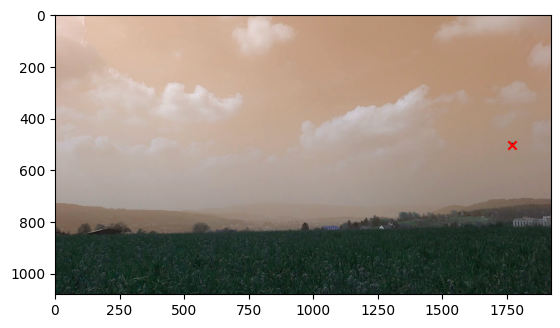

In [32]:
import matplotlib.pyplot as plt

plt.imshow(cv2.imread("extracted_frame.jpg"))
plt.scatter(x, y, c="r", marker="x")
plt.show()

In [41]:
import os

parent_folder = "drone_tracking_video_dataset/train"
labels = os.listdir(f"{parent_folder}/labels")
sorted_labels = sorted(labels, key=lambda x: int(x.split("_")[-1].split(".")[0]))

In [52]:
len(labels)

180316

In [49]:
with open(f"{parent_folder}/labels/{sorted_labels[0]}", "r") as file:
    _, x, y, _, _ = file.read().split()
    x = float(x)
    y = float(y)


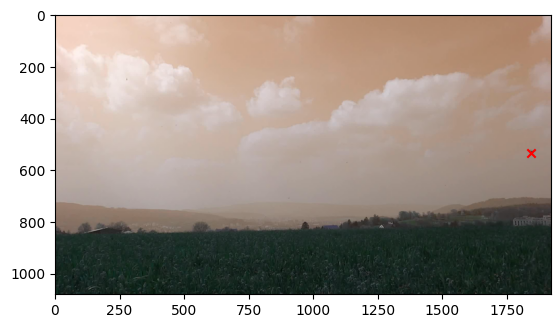

In [51]:
img = cv2.imread(f"{parent_folder}/images/{sorted_labels[0].replace('.txt', '.jpg')}")
height, width = img.shape[:2]
plt.imshow(img)
plt.scatter(x * width, y * height, c="r", marker="x")
plt.show()